# Linking GitHub Datasets

In [ ]:
!git clone https://github.com/picklesueat/data_jobs_data.git

Cloning into 'data_jobs_data'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 85 (delta 41), reused 8 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 14.09 MiB | 3.14 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Updating files: 100% (7/7), done.


In [ ]:
!ls data_jobs_data/data

BusinessAnalyst.csv  DataAnalyst.csv  DataEngineer.csv	DataScientist.csv


In [ ]:
%cd "data_jobs_data/data"
!ls

/content/data_jobs_data/data
BusinessAnalyst.csv  DataAnalyst.csv  DataEngineer.csv	DataScientist.csv


# Loading the dataset


In [ ]:
import pandas as pd

DataAnalyst= pd.read_csv("DataAnalyst.csv")
DataAnalyst.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
DataAnalyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5631 non-null   object 
 1   Salary Estimate    5631 non-null   object 
 2   Job Description    5631 non-null   object 
 3   Rating             5631 non-null   float64
 4   Company Name       5629 non-null   object 
 5   Location           5631 non-null   object 
 6   Headquarters       5631 non-null   object 
 7   Size               5631 non-null   object 
 8   Founded            5631 non-null   int64  
 9   Type of ownership  5631 non-null   object 
 10  Industry           5631 non-null   object 
 11  Sector             5631 non-null   object 
 12  Revenue            5631 non-null   object 
 13  Competitors        5631 non-null   object 
 14  Easy Apply         5631 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 660.0+ KB


# Data Cleaning


In [ ]:
# Select only the columns you want into a new dataframe
DataAnalyst_df = DataAnalyst[["Job Title", "Job Description", "Company Name", "Location", "Industry", "Sector","Rating"]].copy()

In [ ]:
DataAnalyst_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,"New York, NY",Social Assistance,Non-Profit,3.2
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,Visiting Nurse Service of New York\n3.8,"New York, NY",Health Care Services & Hospitals,Health Care,3.8
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,Squarespace\n3.4,"New York, NY",Internet,Information Technology,3.4
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,Celerity\n4.1,"New York, NY",IT Services,Information Technology,4.1
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,FanDuel\n3.9,"New York, NY",Sports & Recreation,"Arts, Entertainment & Recreation",3.9


## Checking for the unique values


In [ ]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    print(f"{col}: {DataAnalyst[col].nunique()} unique values")

Job Title: 2697 unique values
Company Name: 3156 unique values
Location: 617 unique values
Industry: 105 unique values
Sector: 26 unique values


## Removing NULL rows

In [ ]:
DataAnalyst_df.dropna(subset=["Job Title", "Company Name", "Location"], inplace=True)

## Converting values into string-removing extra spaces

In [ ]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    DataAnalyst_df[col] = DataAnalyst_df[col].astype(str).str.strip()

## Normalize whitespace in job description

In [ ]:
DataAnalyst_df["Job Description"] = DataAnalyst_df["Job Description"].str.replace(r"\s+", " ", regex=True).str.strip()
DataAnalyst_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,"New York, NY",Social Assistance,Non-Profit,3.2
1,Quality Data Analyst,Overview Provides analytical and technical sup...,Visiting Nurse Service of New York\n3.8,"New York, NY",Health Care Services & Hospitals,Health Care,3.8
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,Squarespace\n3.4,"New York, NY",Internet,Information Technology,3.4
3,Data Analyst,Requisition NumberRR-0001939 Remote:Yes We col...,Celerity\n4.1,"New York, NY",IT Services,Information Technology,4.1
4,Reporting Data Analyst,ABOUT FANDUEL GROUP FanDuel Group is a world-c...,FanDuel\n3.9,"New York, NY",Sports & Recreation,"Arts, Entertainment & Recreation",3.9


## Cleaning the company format

In [ ]:
DataAnalyst_df["Company Name"] = DataAnalyst_df["Company Name"].str.replace(r"\n\d+(\.\d+)?", "", regex=True).str.strip()
DataAnalyst_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,Vera Institute of Justice,"New York, NY",Social Assistance,Non-Profit,3.2
1,Quality Data Analyst,Overview Provides analytical and technical sup...,Visiting Nurse Service of New York,"New York, NY",Health Care Services & Hospitals,Health Care,3.8
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,Squarespace,"New York, NY",Internet,Information Technology,3.4
3,Data Analyst,Requisition NumberRR-0001939 Remote:Yes We col...,Celerity,"New York, NY",IT Services,Information Technology,4.1
4,Reporting Data Analyst,ABOUT FANDUEL GROUP FanDuel Group is a world-c...,FanDuel,"New York, NY",Sports & Recreation,"Arts, Entertainment & Recreation",3.9


## Checking unique values in the dataset

In [ ]:
for col in ["Company Name", "Location", "Industry", "Sector"]:
    print(f"\nUnique values in '{col}':")
    print(DataAnalyst_df[col].unique())


Unique values in 'Company Name':
['Vera Institute of Justice' 'Visiting Nurse Service of New York'
 'Squarespace' ... 'Reynolds American Inc. (RAI)' 'Reynolds American'
 'Wake Forest Baptist Medical Center']

Unique values in 'Location':
['New York, NY' 'Fairfield, NJ' 'Jersey City, NJ' 'Brooklyn, NY'
 'Weehawken, NJ' 'Long Island City, NY' 'Florham Park, NJ' 'Manhasset, NY'
 'Newark, NJ' 'Queens Village, NY' 'Haworth, NJ' 'Fort Lee, NJ'
 'South Plainfield, NJ' 'Bronx, NY' 'Little Ferry, NJ' 'Lake Success, NY'
 'Summit, NJ' 'Valley Stream, NY' 'Berkeley Heights, NJ' 'Essex Fells, NJ'
 'Franklin Lakes, NJ' 'Mount Vernon, NY' 'Secaucus, NJ' 'West Orange, NJ'
 'Far Rockaway, NY' 'Woodbridge, NJ' 'Parsippany, NJ' 'Whippany, NJ'
 'Great Neck, NY' 'Hoboken, NJ' 'Staten Island, NY' 'Harrison, NY'
 'Iselin, NJ' 'Montvale, NJ' 'Woodcliff Lake, NJ' 'Salt Lake City, UT'
 'West Jordan, UT' 'Lehi, UT' 'Draper, UT' 'American Fork, UT' 'Sandy, UT'
 'Riverton, UT' 'Reedley, CA' 'Visalia, CA' 'Hanford

## Data Viz-Top Job titles

/tmp/ipython-input-3447425263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")


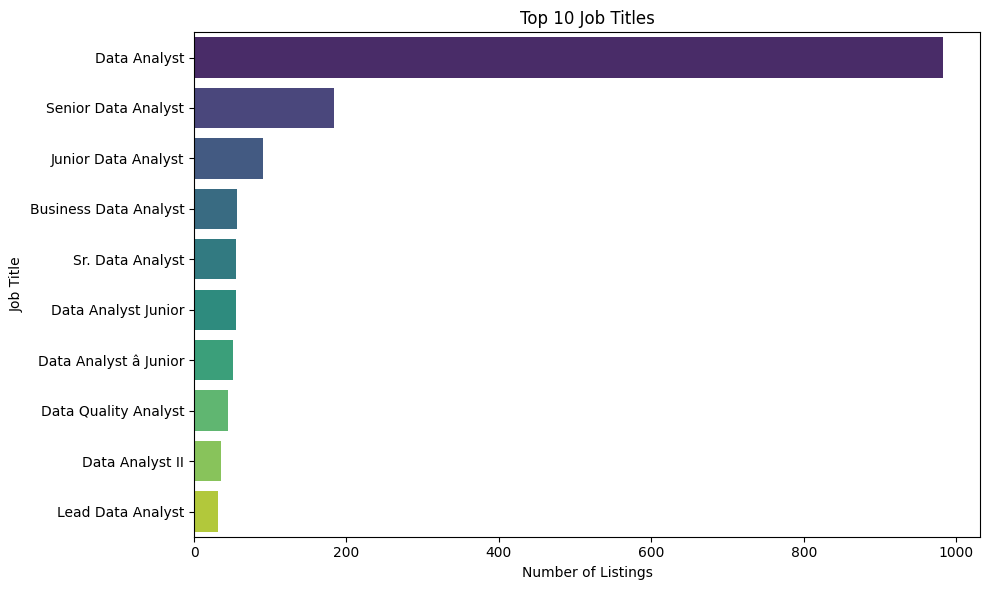

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_job_titles = DataAnalyst_df["Job Title"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

# Saving the dataset

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Define the directory path
save_dir = '/content/drive/My Drive/CleanDatasets'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the dataframe to the specified directory
DataAnalyst_df.to_csv(f'{save_dir}/cleaned_DataAnalyst.csv', index=False)
print(f"Cleaned dataset saved to Google Drive in '{save_dir}'.")

Mounted at /content/drive
Cleaned dataset saved to Google Drive in '/content/drive/My Drive/CleanDatasets'.
